**<h1 style = 'text-align:center'>Looping Graph</h1>**

## 1. Objectives
- Implement looping logic to route the flow of data back to the nodes
- Create a single conditional edge to handle decition-making and control graph flow

**-> Main Goal**: Coding up Looping Logic


In [8]:
from typing import List, TypedDict, Dict
from langgraph.graph import StateGraph, END, START
from IPython.display import display, Image

import random

In [9]:
class AgentState(TypedDict): 
    name: str
    number: List[int]
    counter: int

In [10]:
def greeting_node(state: AgentState) -> AgentState:
    """Greeting node which says hi to the person"""
    state['name'] = f"Hi there, {state['name']}"
    state['counter'] = 0

    return state

def random_node(state: AgentState) -> AgentState:
    """Generates a random number from 0 to 10"""

    state['number'].append(random.randint(0, 10))
    state['counter'] +=1
    return state

def should_continue(state: AgentState) -> AgentState:
    """Function to decide what to do next"""

    if state['counter'] < 5:
        print("Entering loop", state['counter'])
        return "loop"
    else:
        return "exit"


    

In [11]:
# flow: greeting -> random -> random -> random -> random -> random -> END

graph = StateGraph(AgentState)

graph.add_node('greeting', greeting_node)
graph.add_node('random', random_node)

graph.set_entry_point('greeting')
graph.add_edge('greeting', 'random')
graph.add_conditional_edges(
    "random", should_continue,
    {
        "loop": "random",
        "exit": END
    }
)

app = graph.compile()

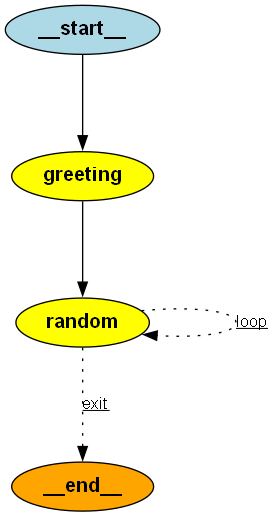

In [12]:
display(Image(app.get_graph().draw_png()))

In [13]:
app.invoke({
    'name': 'Kim',
    'counter': -1,
    'number': []
})

Entering loop 1
Entering loop 2
Entering loop 3
Entering loop 4


{'name': 'Hi there, Kim', 'number': [6, 0, 5, 10, 2], 'counter': 5}